In [29]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Make Data Frame Using Parameters form First

In [3]:
#get all the Files
path='/nfs/see-fs-01_users/gy11s2s/Python/NDACC_files/MLO/Plotting_months/July1991-Feb1992/'
file_paths = []
file_names = sorted(os.listdir(path))
for name in file_names:
        filepath = os.path.join(path,name)
        if os.path.isfile(filepath) and filepath[-4:] == '.txt':
            file_paths.append(filepath)

In [4]:
print file_paths [0]
print file_paths[-1]
# Check number of files in directory
import fnmatch

print len(fnmatch.filter(os.listdir('/nfs/see-fs-01_users/gy11s2s/Python/NDACC_files/MLO/Plotting_months/July1991-Feb1992/'), '*.txt'))

/nfs/see-fs-01_users/gy11s2s/Python/NDACC_files/MLO/Plotting_months/July1991-Feb1992/1991.07.01.txt
/nfs/see-fs-01_users/gy11s2s/Python/NDACC_files/MLO/Plotting_months/July1991-Feb1992/1992.02.25.txt
53


In [5]:
df_MLO = pd.DataFrame()
for files in file_paths:
    print files
    #Read in First First File
    data = np.loadtxt(fname=files, delimiter=',', skiprows=2, usecols=(0,1))
    col1 = data[:,0]
    col2 = data[:,1]
    altitude = col1/1000# Converts altitude to km
    backscatter=col2*0.001
    Date=pd.to_datetime(files[-14:-4], format='%Y.%m.%d') # Converts filename date to Pandas datetime
    d_backscatter={Date : backscatter}
    #print Date
    print d_backscatter
    if df_MLO.empty:
        df_MLO = pd.DataFrame(d_backscatter, index=altitude)
    else:
        df_temp_BS=pd.DataFrame(d_backscatter, index=altitude)
        df_MLO = df_MLO.join(df_temp_BS)


#Transposes Axes so that the TIme is the Index, Makes reading it back in easier.        
df_MLO=df_MLO.transpose()

/nfs/see-fs-01_users/gy11s2s/Python/NDACC_files/MLO/Plotting_months/July1991-Feb1992/1991.07.01.txt
{Timestamp('1991-07-01 00:00:00'): array([  1.334,   1.141,   1.124,   1.144,   1.16 ,   1.179,   1.155,
         1.18 ,   1.179,   1.202,   1.225,   1.214,   1.205,   1.219,
         1.235,   1.24 ,   1.243,   1.267,   1.263,   1.317,   1.607,
         3.447,  13.705,  15.053,   4.951,   1.356,   1.35 ,   1.337,
         1.332,   1.364,   1.348,   1.364,   1.396,   1.412,   1.398,
         1.359,   1.377,   1.411,   1.377,   1.426,   1.459,   1.413,
         1.456,   1.472,   1.447,   1.441,   1.457,   1.471,   1.493,
         1.483,   1.489,   1.426,   1.504,   1.44 ,   1.529,   1.452,
         1.485,   1.551,   1.506,   1.407,   1.406,   1.423,   1.397,
         1.393,   1.287,   1.236,   1.208,   1.305,   1.363,   1.33 ,
         1.355,   1.352,   1.136,   1.179,   1.002,   0.958,   0.828,
         1.032,   0.936,   0.83 ,   1.072,   0.483,   0.533])}
/nfs/see-fs-01_users/gy11s2s/Pyt

In [6]:
#Save data to CSV File
df_MLO.to_csv(path+'MLO_July1991-Feb1992.csv')

In [7]:
#Read from CSV File
MLO_data = pd.DataFrame()
MLO_data=pd.read_csv('/nfs/see-fs-01_users/gy11s2s/Python/NDACC_files/MLO/Plotting_months/July1991-Feb1992/MLO_July1991-Feb1992.csv',
                     index_col=0,parse_dates=True,infer_datetime_format=True)
#Convert the frame to its Numpy-array representation.
MLO_data=MLO_data.transpose() # Transpose it so it is easier to plot
MLO_data.as_matrix #Turns it into a normal Numpy array;
                    #Doing this makes it so you dont have to define X, Y and Z when plotting

<bound method DataFrame.as_matrix of         1991-07-01  1991-07-02  1991-07-03  1991-07-05  1991-07-08  \
15.692       1.334       1.106       1.175       1.290       1.223   
15.992       1.141       1.178       1.155       1.167       1.192   
16.292       1.124       1.499       1.144       1.153       1.144   
16.592       1.144       1.219       1.185       1.169       1.120   
16.892       1.160       1.095       1.140       1.133       1.129   
17.191       1.179       1.069       1.111       1.132       1.135   
17.491       1.155       1.073       1.129       1.152       1.168   
17.791       1.180       1.081       1.140       1.165       1.221   
18.091       1.179       1.109       1.161       1.168       1.243   
18.391       1.202       1.093       1.159       1.179       1.259   
18.69        1.225       1.109       1.187       1.173       1.609   
18.99        1.214       1.127       1.212       1.200       4.655   
19.29        1.205       1.126       1.197       1.24

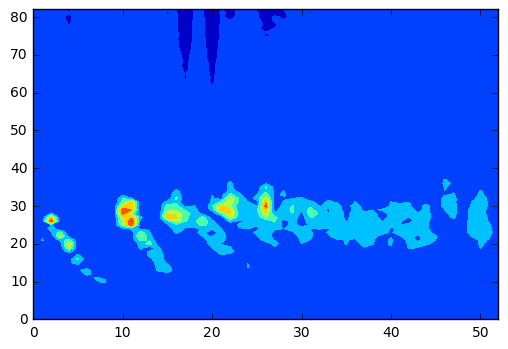

In [8]:
#Plot Contour form Data Frame As a Matrix

fig = plt.figure()
graph = fig.add_subplot(111)
graph.contourf(MLO_data)
#Not quite sure why it does not use the dates on the x axis or actual altitudes

In [21]:
MLO_data_masked_array.shape

(83, 53)

/apps/developers/compilers/canopy/1.7.4/1/bit-64/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: divide by zero encountered in log10
/apps/developers/compilers/canopy/1.7.4/1/bit-64/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in log10


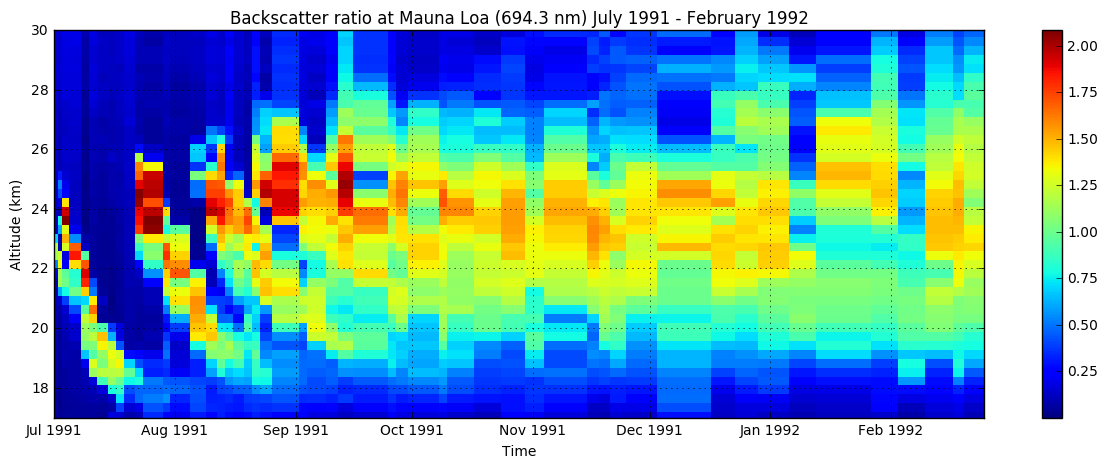

In [27]:
#Using column and Index Info
Dates=MLO_data.columns# This is in date time format so it is easy to deal with
#print Dates
Alts=map(float,pd.Index.tolist(MLO_data.index)) #Initially this is in a funny Index object so we need to change to a list of float values
#print Alts


# define the colormap
cmap = plt.cm.get_cmap('OrRd', 11)
# extract all colors from the map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (1.0,1.0,1.0,1.0)
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
#Set Color For Values less than plot Bounds
cmap.set_under('w')


MLO_data_masked_array=np.ma.masked_where(MLO_data<1, MLO_data) # Masking out data below a Threshold

#Make it Log-Scale to See FIne Details.
MLO_data_masked_array_Log=np.log10(MLO_data_masked_array)

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
# pcolor "shows" where Python would try to interpolate - i.e. similar to Aspendale data.
MLO=ax.pcolor(Dates,Alts,MLO_data_masked_array_Log)#8,cmap=cmap, vmin=0, vmax=2)
# contourf creates the initial contoured plot shown on posters.
#MLO=ax.contourf(Dates,Alts,MLO_data_masked_array_Log,8,cmap=cmap, vmin=0, vmax=2)
cbar = plt.colorbar(MLO) # Creates colour bar/scale
plt.title('Backscatter ratio at Mauna Loa (694.3 nm) July 1991 - February 1992')
plt.xlabel('Time')
plt.ylabel('Altitude (km)')
plt.grid()
plt.ylim(17,30)
fig.savefig('/nfs/see-fs-01_users/gy11s2s/Python/Layers_over_time_analysis/Lidar/PCOLORJuly1991-Feb1992.png', bbox_inches='tight')

In [31]:
pd.dates

AttributeError: 'module' object has no attribute 'dates'